In [2]:
print("Hello Zuko Here !!!")

[1] "Hello Zuko Here !!!"


# Basic Methodlolgy

1) Transpose the Test Set
2) Calculate the average of the average temperature per state
3) Subtract it  from all the records to get the delta
4) Normailze the deltas Statewise
5) Take set of distinct values statewise
6) Make a scatter plot of normailized deltas against Energy consumption
7) See if LR is possible to get a basic idea if energy consumption varies with the deltas


# Data Transpose

In [3]:
library(tidyr)

In [4]:
path = 'D:\\jupyterlab\\silicon-valley-chapter-data-science-for-climate-change\\src\\data\\train.csv'

In [5]:
df = read.csv(path, encoding='utf-8')

In [6]:
head(df)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,...,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,36,50.5,...,14,0,0,0,1,1,1,NA,248.682615,0
2,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000,1955,45,1.8,36,50.5,...,14,0,0,0,1,NA,1,12,26.500150,1
3,1,State_1,Commercial,Retail_Enclosed_mall,280025,1951,97,1.8,36,50.5,...,14,0,0,0,1,NA,1,12,24.693619,2
4,1,State_1,Commercial,Education_Other_classroom,55325,1980,46,1.8,36,50.5,...,14,0,0,0,1,NA,1,12,48.406926,3
5,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000,1985,100,2.4,36,50.5,...,14,0,0,0,1,1,1,NA,3.899395,4
6,1,State_1,Commercial,Warehouse_Selfstorage,119900,1956,NA,2.4,36,50.5,...,14,0,0,0,1,1,1,NA,6.597715,5


In [7]:
months = c('january','february','march','april','may','june','july','august','september','october','november','december')
types = c('min','avg','max')

In [8]:
col_list <- vector()
for (month in months){
    for (type in types){

        col_name = paste(month,'_',type,'_','temp',sep = '')
        col_list = c(col_list,col_name)
    }


}

In [9]:
df.long <- 

df %>% 
  pivot_longer(
    cols = col_list, 
    names_to = "month", 
    values_to = "temp",
    values_drop_na = TRUE
  )

Note: Using an external vector in selections is ambiguous.
i Use `all_of(col_list)` instead of `col_list` to silence this message.
i See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



In [15]:
head(df.long)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,cooling_degree_days,heating_degree_days,...,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,month,temp
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,...,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>
1,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,0,0,1,1,1,NA,248.6826,0,january_min_temp,36.00000
2,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,0,0,1,1,1,NA,248.6826,0,january_avg_temp,50.50000
3,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,0,0,1,1,1,NA,248.6826,0,january_max_temp,68.00000
4,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,0,0,1,1,1,NA,248.6826,0,february_min_temp,35.00000
5,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,0,0,1,1,1,NA,248.6826,0,february_avg_temp,50.58929
6,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,0,0,1,1,1,NA,248.6826,0,february_max_temp,73.00000


# Column Split

In [16]:
df.long <- as.data.frame(df.long)
head(df.long)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,cooling_degree_days,heating_degree_days,...,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,month,temp
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,...,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>
1,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,0,0,1,1,1,NA,248.6826,0,january_min_temp,36.00000
2,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,0,0,1,1,1,NA,248.6826,0,january_avg_temp,50.50000
3,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,0,0,1,1,1,NA,248.6826,0,january_max_temp,68.00000
4,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,0,0,1,1,1,NA,248.6826,0,february_min_temp,35.00000
5,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,0,0,1,1,1,NA,248.6826,0,february_avg_temp,50.58929
6,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,0,0,1,1,1,NA,248.6826,0,february_max_temp,73.00000


In [17]:
df.long.split <- separate(data = df.long, col = month, into = c("month", "type"), sep = "_")

Warning message:
"Expected 2 pieces. Additional pieces discarded in 2727252 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...]."


In [18]:
# Convert colum names to ordered factors 
df.long.split$month_f <- factor(df.long.split$month, levels = months)

In [19]:
head(df.long.split)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,cooling_degree_days,heating_degree_days,...,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,month,type,temp,month_f
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<dbl>,<fct>
1,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,1,1,1,NA,248.6826,0,january,min,36.00000,january
2,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,1,1,1,NA,248.6826,0,january,avg,50.50000,january
3,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,1,1,1,NA,248.6826,0,january,max,68.00000,january
4,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,1,1,1,NA,248.6826,0,february,min,35.00000,february
5,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,1,1,1,NA,248.6826,0,february,avg,50.58929,february
6,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,1,1,1,NA,248.6826,0,february,max,73.00000,february


# Data Export

In [54]:
# Write dataframe to csv
path = 'D:\\jupyterlab\\silicon-valley-chapter-data-science-for-climate-change\\src\\data\\train_long.csv'
df.long.split %>% write.csv(file = path, sep = ',')

Warning message in write.csv(., file = path, sep = ","):
"attempt to set 'sep' ignored"


# Termperature Normailization

In [20]:
df.long.split.avg <- df.long.split[df.long.split$type=='avg',] 
head(df.long.split.avg)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,cooling_degree_days,heating_degree_days,...,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,month,type,temp,month_f
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<dbl>,<fct>
2,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,1,1,1,NA,248.6826,0,january,avg,50.50000,january
5,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,1,1,1,NA,248.6826,0,february,avg,50.58929,february
8,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,1,1,1,NA,248.6826,0,march,avg,53.69355,march
11,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,1,1,1,NA,248.6826,0,april,avg,55.50000,april
14,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,1,1,1,NA,248.6826,0,may,avg,56.85484,may
17,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942,11,2.4,115,2960,...,1,1,1,NA,248.6826,0,june,avg,60.50000,june


A preliminary analysis shows that there is no linear relationship between average temperatures and site eui
Hence we will not proceed with deltas and normailzarion insatead proceed with cuts of the data plot

# Data Visiulization on builiding type

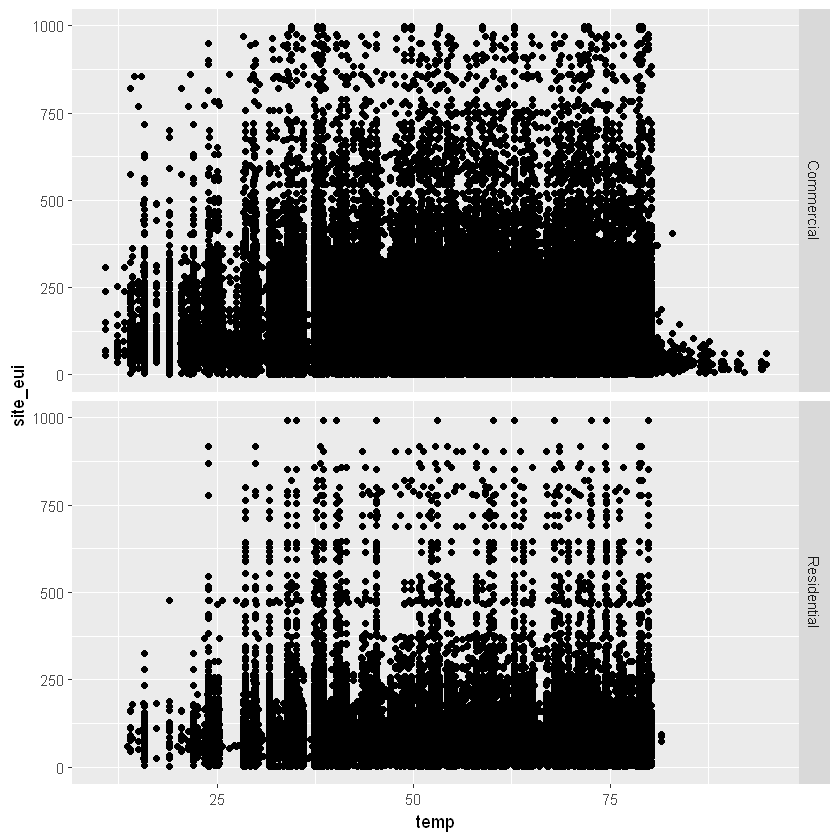

In [21]:
library(ggplot2)
ggplot(df.long.split.avg, aes(x=temp, y=site_eui)) + geom_point()+
facet_grid(rows = vars(building_class))

# Data Visiulization on months

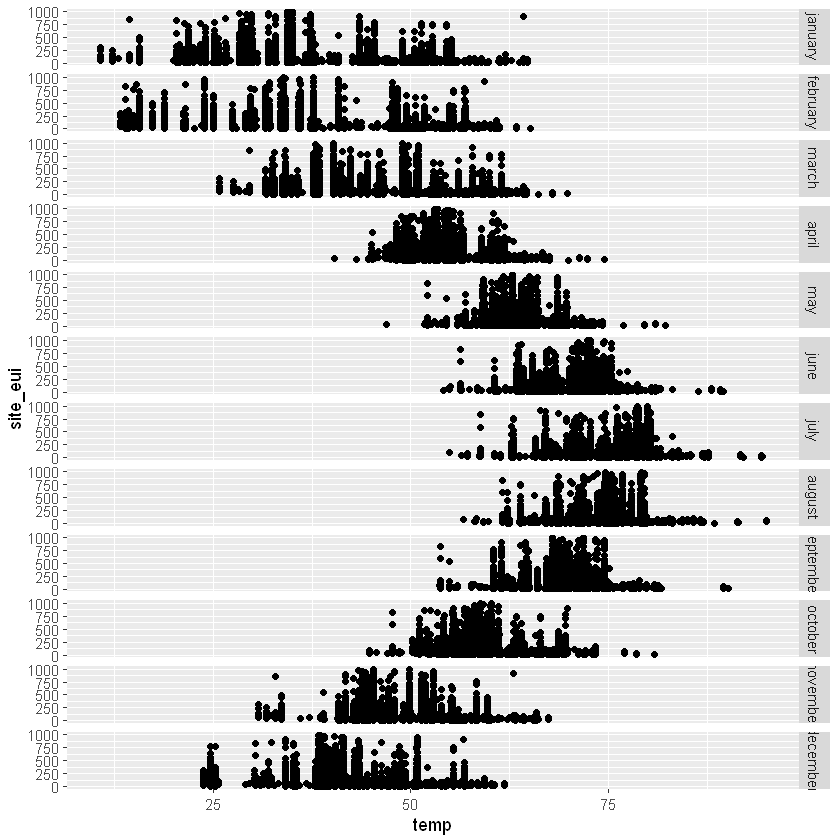

In [22]:
 library(ggplot2)
ggplot(df.long.split.avg, aes(x=temp, y=site_eui)) + geom_point()+
facet_grid(rows = vars(month_f))

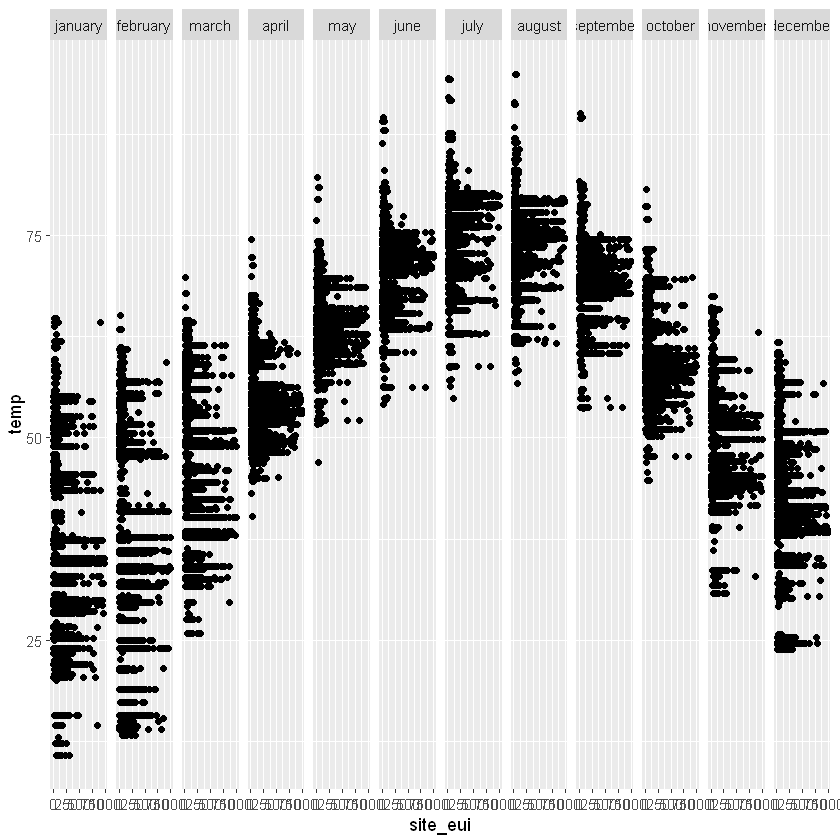

In [23]:
ggplot(df.long.split.avg, aes(x=site_eui, y=temp)) + geom_point()+
facet_grid(cols = vars(month_f))

# Conclusion

We see that there is no stron corelation between the average temperature and energy consumption.
This could be due to the fact that there are a very large variety of buildigs Considered